In [46]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity


In [47]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'q')
# Create a Classical Register with 3 qubits.
c=ClassicalRegister(3,'c')
# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q,c)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(q[0], q[2])

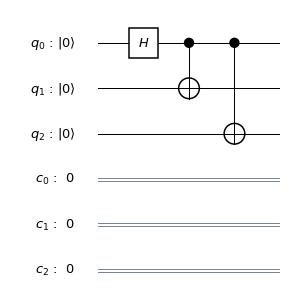

In [48]:
circ.draw(output='mpl')

In [49]:
circ.measure(q,c)
# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [50]:
counts = result_sim.get_counts(circ)
print(counts)

{'111': 531, '000': 493}


In [51]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)